In [16]:
## IMPORT NECESSARY LIBRARIES
from google.colab import files
import pandas as pd
import numpy as np
from keras import models
from keras import initializers
from keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [17]:
## GETTING THE DATA
upload = files.upload()

Saving deliverytime.csv to deliverytime (1).csv


In [18]:
## CONVERTING THE DATA INTO DATAFRAME
df = pd.read_csv('deliverytime.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [19]:
## PREPROCESSING THE DATA

### CLEANING THE AGE COLUMN AS IT HAS MIXED VALUES
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')


In [20]:
### ENCODING THE CATEGORICAL COLUMNS
label_encoder_order = LabelEncoder()
df['Type_of_order'] = label_encoder_order.fit_transform(df['Type_of_order'])
label_encoder_vehicle = LabelEncoder()
df['Type_of_vehicle'] = label_encoder_vehicle.fit_transform(df['Type_of_vehicle'])

In [21]:
## SLICING THE TARGET AND FEATURE COLUMNS
X = df.iloc[:,2:10]
y = df['Time_taken(min)']


In [22]:
## FEATURE SCALING
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.3088078   0.81669202  0.69973208 ...  0.23991995  1.33252749
  -0.41233371]
 [ 0.78218994 -0.40392194 -0.50148783 ...  0.32992439  1.33252749
   1.24752244]
 [-1.14874221 -0.70907544 -0.50133841 ...  0.32401315 -0.45587809
  -0.41233371]
 ...
 [ 0.08003279  0.81669202 -0.48812769 ...  0.44637171 -0.45587809
   1.24752244]
 [-1.67536007  0.20638504 -0.73499834 ...  0.29265882  1.33252749
  -0.41233371]
 [-1.14874221  0.81669202  0.77377088 ...  0.68944165  1.33252749
   1.24752244]]


In [23]:
## TRAIN TEST SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
## BUILDING THE MODEL
model = models.Sequential()
model.add(layers.Dense(16, input_dim = 8, activation = 'relu', kernel_initializer = 'glorot_uniform', kernel_regularizer = 'L2'))
model.add(layers.Dense(8, activation = 'elu', kernel_initializer = 'glorot_normal'))
model.add(layers.Dense(1, activation = 'relu', kernel_initializer = 'he_normal'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
## MODEL COMPILING
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
## TRAINING THE NETWORK
history = model.fit(X_train, y_train, epochs = 50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1140/1140 [==============================] - 3s 2ms/step - loss: 215.2195 - val_loss: 81.5752
Epoch 2/50
1140/1140 [==============================] - 2s 2ms/step - loss: 78.7124 - val_loss: 75.9952
Epoch 3/50
1140/1140 [==============================] - 2s 2ms/step - loss: 74.7811 - val_loss: 73.4573
Epoch 4/50
1140/1140 [==============================] - 2s 2ms/step - loss: 72.9478 - val_loss: 72.3609
Epoch 5/50
1140/1140 [==============================] - 2s 2ms/step - loss: 72.1787 - val_loss: 71.9375
Epoch 6/50
1140/1140 [==============================] - 2s 2ms/step - loss: 71.7528 - val_loss: 71.7634
Epoch 7/50
1140/1140 [==============================] - 2s 2ms/step - loss: 71.2710 - val_loss: 71.1076
Epoch 8/50
1140/1140 [==============================] - 2s 2ms/step - loss: 70.2396 - val_loss: 69.6437
Epoch 9/50
1140/1140 [==============================] - 2s 2ms/step - loss: 68.9823 - val_loss: 68.9903
Epoch 10/50
1140/1140 [==============================] - 2s 2ms

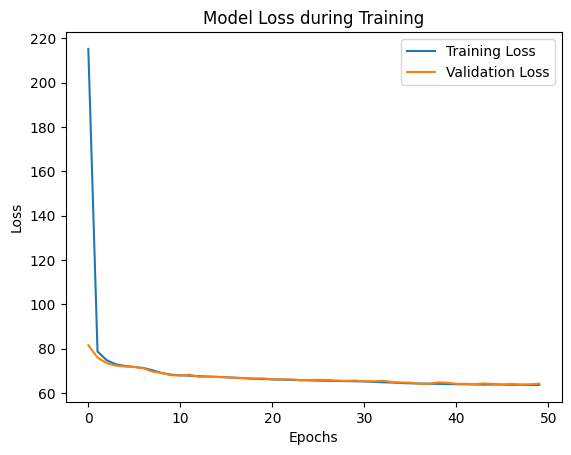

In [27]:
## PLOTTING THE TRAINING HISTORY

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
## INLINE PREDICTION
y_pr = model.predict(X_test)

285/285 [==============================] - 0s 1ms/step


In [29]:
## MODEL EVALUATION
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


285/285 [==============================] - 0s 1ms/step - loss: 64.2003
Test Loss: 64.20027160644531
